# Plotting our Bechdel-Test Results and User Input

## Input:
For plotting, we are working with our Bechdel Results CSV we created before.
For the User input we are also working with the cleaned movie data CSV from before, as well as our helper functions.

## Output
In this notebook we are creating different plots to visualize how many movies pass each criterion of the Bechdel Test and to analyse whether criteria like year, budget and audience  voting have an impact on whether or not the test is passed.
In the second part, the user can input a movie for which they want to know the result of the Bechdel Test. The user can then also ask which characters exactly are talking with each other and in which lines they do.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [7]:
bechdel = pd.read_csv('bechdeltest_results.csv')

In [8]:
bechdel.head()

,Unnamed: 0,Movie_title,First_Criterion,Second_Criterion,Third_Criterion,release_date,budget,voting,original_language
0,0,Hellraiser,1.0,1.0,1.0,1987-09-11,1000000.0,6.9,en
1,0,Broadcast News,1.0,1.0,1.0,1987-12-16,20000000.0,6.8,en
2,0,The Queen,1.0,1.0,1.0,2006-09-15,15000000.0,6.8,en
3,0,Hesher,1.0,1.0,1.0,2010-01-22,7000000.0,6.7,en
4,0,Martha Marcy May Marlene,1.0,1.0,1.0,2011-10-21,0.0,6.7,en


In [9]:
# Currently we have the exact release date given in our dtaframe, for plotting it is nicer if we only have the year given,
# that's why we change that column here:
# first we create a list with the release year of each movie
years = []
for i, year in enumerate(bechdel.release_date):
    years.append(bechdel.release_date[i][:4])

# we create a dataframe with that list and exchange the release_date column with it
years_data ={'release_year': years}
years_df = pd.DataFrame(years_data)
bechdel = bechdel.assign(release_date=years_df['release_year'])

# Because we only have movies with english as their original language, we can drop the entire column here,
# because this won't be interesting to plot
del bechdel['original_language']
# We can also delete the unnamed column
del bechdel['Unnamed: 0']

In [10]:
bechdel.head()

,Movie_title,First_Criterion,Second_Criterion,Third_Criterion,release_date,budget,voting
0,Hellraiser,1.0,1.0,1.0,1987,1000000.0,6.9
1,Broadcast News,1.0,1.0,1.0,1987,20000000.0,6.8
2,The Queen,1.0,1.0,1.0,2006,15000000.0,6.8
3,Hesher,1.0,1.0,1.0,2010,7000000.0,6.7
4,Martha Marcy May Marlene,1.0,1.0,1.0,2011,0.0,6.7


## Plotting our Bechdel-Test results

In [11]:
# setting some parameters for plotting
plt.rcParams["figure.figsize"] = [8, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['text.color'] = 'grey'
plt.rcParams['axes.edgecolor'] = 'grey'
plt.rcParams['xtick.color'] = 'grey'
plt.rcParams['ytick.color'] = 'grey'

# we will need the total number of movies we have in our dataframe for calculating percentages later
list_of_movies = bechdel['Movie_title'].tolist()
length = len(list_of_movies)

<function matplotlib.pyplot.show(close=None, block=None)>

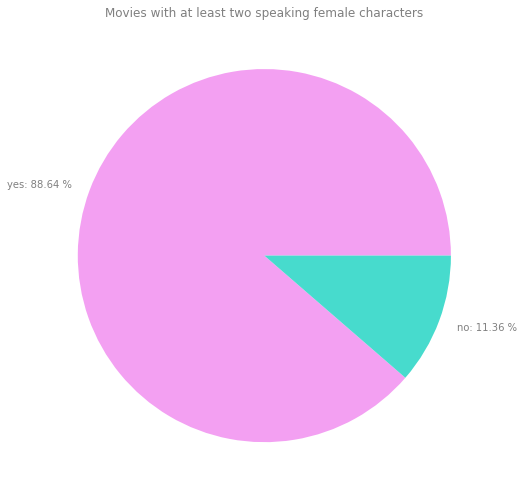

In [12]:
# Bar plot for how many movies pass our first criterion: at least two speaking female characters

# getting the number of movies that passed the first criterion and the number of those which did not
first_criterion = bechdel.loc[bechdel['First_Criterion'] == 1.0].count()[0]
failed_first_criterion = len(list_of_movies) - first_criterion
# calculating the percentages 
percent_first =  round((first_criterion/length)*100, 2)
percent_not = round(100 - percent_first, 2)
# 0.2?
plt.title('Movies with at least two speaking female characters') # Two speaking female characters
# creating the actual pie plot
plt.pie([first_criterion, failed_first_criterion], labels = ['yes: ' + str(percent_first) + ' %', 'no: ' + str(percent_not)+ ' %'], colors = ['#F3A0F2', '#47DBCD'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

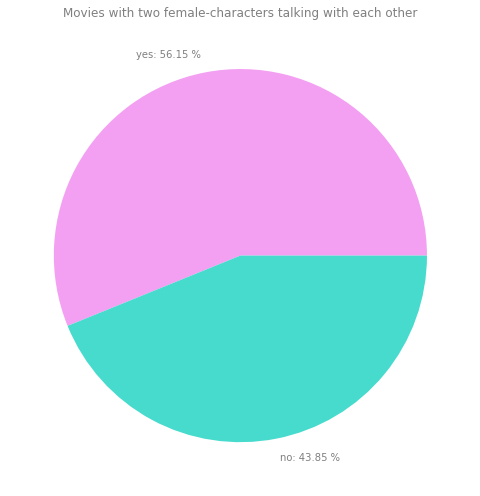

In [13]:
# Bar plot for how many movies pass our second criterion: two female characters talking to each other

# getting the number of movies that passed the second criterion and the number of those which did not
second_criterion = bechdel.loc[bechdel['Second_Criterion'] == 1.0].count()[0]
failed_second_criterion = len(list_of_movies) - second_criterion
# calculating the percentages
percent_second =  round((second_criterion/length)*100, 2)
percent_not_s = round(100 - percent_second, 2)

plt.title('Movies with two female-characters talking with each other')
# creating the actual pie plot
plt.pie([second_criterion, failed_second_criterion], labels = ['yes: ' + str(percent_second) + ' %', 'no: ' + str(percent_not_s) + " %"  ], colors = ['#F3A0F2', '#47DBCD'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

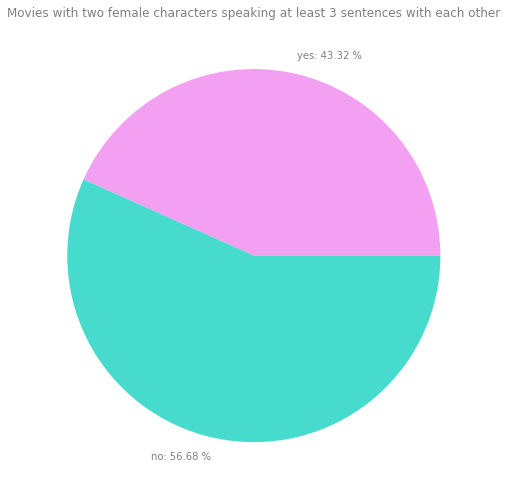

In [15]:
# Bar plot for how many movies pass our third criterion: two female characters speaking at least 3 sentences with each other

# getting the number of movies that passed the third criterion and the number of those which did not
third_criterion = bechdel.loc[bechdel['Third_Criterion'] == 1.0].count()[0]
failed_third_criterion = len(list_of_movies) - third_criterion
# calculating the percentages
percent_third =  round((third_criterion/length)*100, 2)
percent_not_t = round(100 - percent_third, 2)

plt.title('Movies with two female characters speaking at least 3 sentences with each other')
# creating the actual pie plot
plt.pie([third_criterion, failed_third_criterion], labels = ['yes: ' + str(percent_third) + ' %', 'no: ' + str(percent_not_t) + " %"], colors = ['#F3A0F2', '#47DBCD']) 
plt.show

Films combine fictional elements with real dynamics in the most exciting way possible. After all, the viewers should be able to recognize themselves in the characters.
In this sense, they function as a mirror of society. 
However, in its form they tie in with how knowledge and power are unequally distributed in our society. Therefore, the film mirrors our society in the sense that whoever is perceived as less relevant also dissappears from the reflection. 
This is not only pointed at by the results of our Categorization analysis but also supported by many studies about the representation of women in film. The same goes for other marginalised groups in our society, which distords the perceiption of their roles and places in the real world.  

## Bechdel test passing over the course of time:

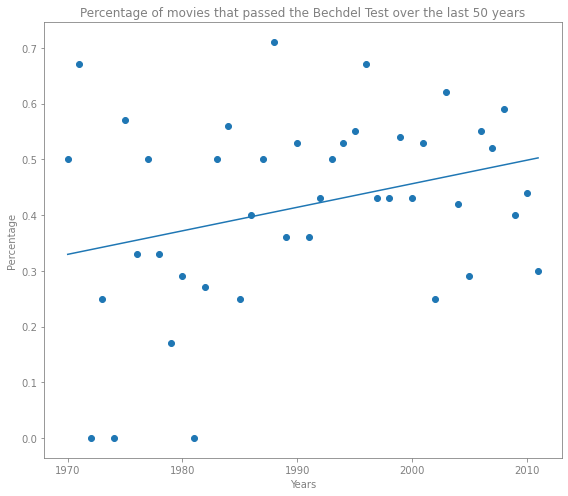

This is the slope: 0.0042192691029900335


In [21]:
# Now we want to see how the percentage of of movies that passed the Bechdel Test (Third Criterion) changed over the last 50 years

# lists that we will need later
percentage_list = []
year_list = []
# setting our start year for the plot
release_year = 1970

# Because we have too many different years given in our dataframe, we group them together
while release_year < 2012:
    until = 0
    count = 0
    
    for i, year in enumerate(bechdel.release_date):
      if int(year) == release_year:
          until += 1 # counts the movies in the release_year's range
          # for each entry in the release_date column of our dataframe we check whether the year is in the range of 4 years of our release year variable
          if bechdel.Third_Criterion[i] == 1.0:
              count +=1 # counts the movies in the release_year's range that pass the third Criterion (=full Bechdel-Test)
    
    # dividing our 'count' count by our 'until' count to get the percentage of movies that passed the Bechdel-Test and appending to our percentage list
    percentage_list.append(round(count/until, 2))
    year_list.append(release_year) # appending the current release_year for plotting later
    release_year += 1 # increasing the release_year

# Creating the plot with our previously made year- and percentage-lists
slope, intercept, r, p, std_err = stats.linregress(year_list, percentage_list)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, year_list))

plt.scatter(year_list, percentage_list)
plt.plot(year_list, mymodel)
plt.ylabel('Percentage', color = 'grey')
plt.xlabel('Years', color = 'grey')
plt.title('Percentage of movies that passed the Bechdel Test over the last 50 years')
plt.show()

print("This is the slope:", slope)

## Movie budget and bechdel test passing:

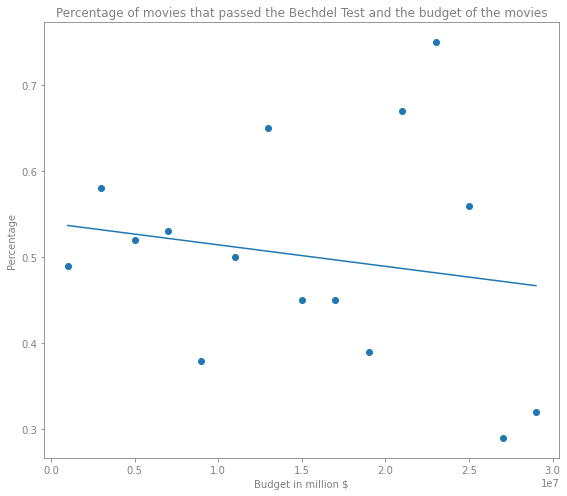

This is the slope: -2.4999999999999992e-09


In [18]:
# Now we want to see whether the budget of the movies has as impact on the percentage of of movies that passed the Bechdel Test (Third Criterion)

# lists that we will need later
percentage_list = []
budget_list = []
# setting our start budget for the plot
budget_helper = 1000000

# Because we have too many different budgets given in our dataframe, we group them together
while budget_helper < 30000000:
    until = 0
    count = 0
    
    for i, budget in enumerate(bechdel.budget):
        # for each entry in the budget column of our dataframe we check whether the budget is in the range of 2.000.000$ of our budget_helper
        if int(budget) > (budget_helper-1000000) and int(budget) <= budget_helper+1000000:
            until += 1 # counts the movies in the budget_helper's range
            if bechdel.Third_Criterion[i] == 1.0:
                count +=1 # counts the movies in the budget_helper's range that pass the third Criterion (=full Bechdel-Test)
    
    # dividing our 'count' count by our 'until' count to get the percentage of movies that passed the Bechdel-Test and appending to our percentage list
    percentage_list.append(round(count/until, 2))
    budget_list.append(budget_helper) # appending the current budget_helper for plotting later
    budget_helper += 2000000 # increasing our budget_helper

# lets get the important key values of linear regression
slope, intercept, r, p, std_err = stats.linregress(budget_list, percentage_list)

# Run each value of the x array through the function to calculate the corresponding y-value.
mymodel = list(map(myfunc, budget_list))

# Draw the original scatter plot:
plt.scatter(budget_list, percentage_list)
#Draw the line of linear regression:
plt.plot(budget_list, mymodel)
plt.ylabel('Percentage', color = 'grey')
plt.xlabel('Budget in million $', color = 'grey')
plt.title('Percentage of movies that passed the Bechdel Test and the budget of the movies')
plt.show()

print("This is the slope:", slope)

## Audience votings and bechdel test passing

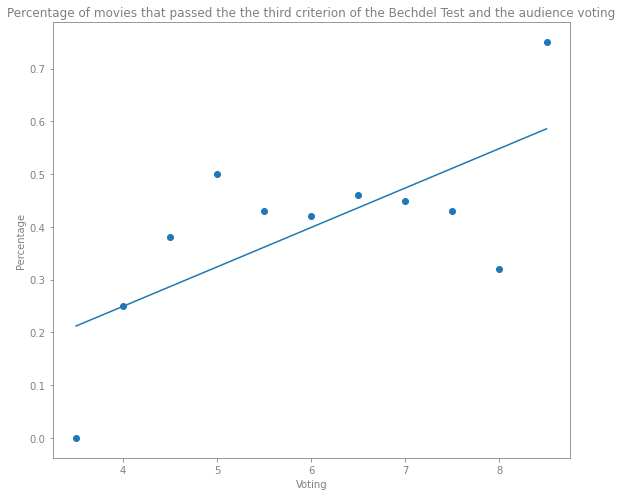

This is the slope: 0.07472727272727273


In [20]:
# Now we want to see whether the audience votings of the movies has as impact on the percentage of of movies that passed the Bechdel Test (Third Criterion)

# lists that we will need later
percentage_list = []
voting_list = []
# setting our start voting for the plot
voting_helper = 3.5

# Because we have too many different votings given in our dataframe, we group them together with a range of 0.5 points
while voting_helper < 9:
    until = 0
    count = 0
    
    for i, voting in enumerate(bechdel.voting):
        # for each entry in the voting column of our dataframe we check whether the voting is in the range of 0.5 of our voting_helper
        if float(voting) > (voting_helper-0.25) and float(voting) <= voting_helper+0.25:
            until += 1 # counts the movies in the voting_helper's range
            if bechdel.Third_Criterion[i] == 1.0:
                count +=1 # counts the movies in the voting_helper's range that pass the third Criterion (=full Bechdel-Test)
    
    # dividing our 'count' count by our 'until' count to get the percentage of movies that passed the Bechdel-Test and appending to our percentage list
    percentage_list.append(round(count/until, 2))
    voting_list.append(voting_helper) # appending the current voting_helper for plotting later
    voting_helper += 0.5 # increasing the voting_helper

# lets get the important key values of linear regression
slope, intercept, r, p, std_err = stats.linregress(voting_list, percentage_list)

# Run each value of the x array through the function to calculate the corresponding y-value.
mymodel = list(map(myfunc, voting_list))

# Draw the original scatter plot:
plt.scatter(voting_list, percentage_list)
#Draw the line of linear regression:
plt.plot(voting_list, mymodel)
plt.title('Percentage of movies that passed the the third criterion of the Bechdel Test and the audience voting')
plt.ylabel('Percentage', color = 'grey')
plt.xlabel('Voting', color = 'grey')
plt.show()

print("This is the slope:", slope)

## Interpretation of the results 

In case of the budget spending, our slope is slightly negative, indicating that a higher budget goes along with a lower percantage of movies passing the bechdel test. In terms of the bechdel-test passing percentages between 1970-2012, the slope is positive, indicating that over the course of time more and more movies started to pass the bechdel-test. 

HOWEVER, in order to reliably find out whether there is a significant linear relationship between the independent Variable X and the dependent variable Y, we would've needed to choose a significance level as well as specifying a proper test method. 
An additional issue is, that there is a persumed lack of homoscedasticity of the residuals of our individual datapoints at least in case of the budget-bechdel relationship. The cone-shaped distribution of the residuals of the datapoints indicates the presence of heteroscedasticity. This is a problem because regressions involving ordinary least squares (OLS) assume that the residuals are drawn from a population with constant variance.

For these reasons, our graphical visualisations are only for roughly getting a better overview of our analysis results and not to be taken as statistial evidence for correlation behaviour. We didn't go further in depth regarding the statistical interpretation of our results, as our main work lies within the categorization of movies regarding the bechdel-test. 


## User input

In [5]:
df = pd.read_csv(r'movie_data_cleaned_new.csv')
%run -i helper_functions.py  # in this, we saved the functions necessary for conducting the Bechdel-Test

## User can check results of the Bechdel-Test

In [4]:
# Welcomeing words and explanation of the Bechdel-Test
# Example for not passing the bechdel-test: Toy Story 
# Example for passing the bechdel-test: Sense and Sensibility
print("Hello and welcome to our program about the Bechdel Test!\n"
      "The Bechdel Test is a test to check the representation of women in a movie. It has three criterions:\n"
      "1. Are there at least two female characters in the movie?\n"
      "2. Are there female characters talking to each other?\n"
      "3. Are there female characters talking to each other for more than 3 sentences?"
      "\n")

# getting input from the user
user_input = input("Enter the movie for which you want to know the result of the Bechdel-Test.\n"
                   "Watch your spelling!")

# Here we use a try-except block, because if we don't have the requested movie in our dataframe, 
# there would be error-messages from the following code in the try-block
try:
    # first we carry out the bechdel test for the requested movie
    our_movie = df[df['title_of_movie']==user_input].reset_index(drop=True)
    our_movie = our_movie.dropna(subset=["character"])
    print("Results for:", user_input, "\n") 
    bechdel_our_movie = bechdel_test(our_movie)
    # checking if the requested movie passes the first criterion
    if bechdel_our_movie['Named_Character']:
        print('The movie passes the first criterion: There are at least two female characters in ' + user_input)
    else:
        print("This movie does not pass any of the criterions of the Bechdel-Test")
    # chhecking if the requested movie passes the second criterion
    if bechdel_our_movie['Consecutive_dialog']:
        print('The movie passes the second criterion: There are female characters talking to each other.')
    else:
        print("There are no women talking to each other in this movie")
    # checking if the requested movie passes the third criterion
    if bechdel_our_movie['More_than_two_sentences']:
        print('The movie passes the third criterion: There are female characters talking to each other for more than 3 sentences.')
        print("YAY! " + user_input + " passes the whole Bechdel-Test!")
    else:
        print("There are no women in this movie speaking with each other for more than 3 sentences.")
except:
    print("Sorry, it seems like we do not have your requested movie in our database :(")

user_input2 = input("Do you want to know which characters exactly are talking with each other and in which lines?\n"
                   "Please enter yes/no.")

try:
    if user_input2 == "yes": 
        if bechdel_our_movie["Who_is_talking"]:
            print(bechdel_our_movie["Who_is_talking"])
        else:
            print("There are no female characters talking with each other")
    elif user_input2 == "no":
        print("Thanks for taking the Bechdel test of {}. Have a nice day!".format(user_input))
except:
    print("Please write either \"no\" or \"yes\"")

Hello and welcome to our program about the Bechdel Test!
The Bechdel Test is a test to check the representation of women in a movie. It has three criterions:
1. Are there at least two female characters in the movie?
2. Are there female characters talking to each other?
3. Are there female characters talking to each other for more than 3 sentences?

Enter the movie for which you want to know the result of the Bechdel-Test.
Watch your spelling!Toy Story
Results for: Toy Story 

Sorry, it seems like we do not have your requested movie in our database :(
Do you want to know which characters exactly are talking with each other and in which lines?
Please enter yes/no.yes
Please write either "no" or "yes"
